# Manipulando datas no R

## Motivação
- Biblioteca lubridate
- Convertendo string para data
- Operações com datas
- Trabalhando com periodos
- Estudo de caso de um problema 

In [1]:
# Carregando as bibliotecas

library(tidyverse)
library(lubridate)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




## Datas
Datas são representadas pelas classes POSIXct, POSIXLt ou Date.<br>
Alguns comandos elementares do sistema:
- Sys.timezone()
- Sys.Date()
- Sys.time()

Alguns comandos elementares do pacote lubridate:
- today()
- now()

In [2]:
Sys.timezone()
Sys.Date()
Sys.time()
today()
now()

[1] "America/Sao_Paulo"

[1] "2022-03-12"

[1] "2022-03-12 19:58:29 -03"

[1] "2022-03-12"

[1] "2022-03-12 19:58:29 -03"

In [3]:
# Convertendo strings para datas

datas <- c("2010-07-01", "2019-01-01", "2020-01-01")

class(datas)

datas <- as.Date(datas)

class(datas)

datas

[1] "character"

[1] "Date"

[1] "2010-07-01" "2019-01-01" "2020-01-01"

In [4]:
datas2 <- c("01/31/2010", "01/31/2015", "01/31/2020")

datas2

as.Date(datas2, format = "%m/%d/%Y")

[1] "01/31/2010" "01/31/2015" "01/31/2020"

[1] "2010-01-31" "2015-01-31" "2020-01-31"

In [5]:
# Usando lubridate

ymd(datas)

mdy(datas2)

# De strings - mais comuns, principalmente vindas de arquivos externos

ymd("1985-01-31")

mdy("April 1st, 2012")

dmy("31-Dec-2019")

ymd(19450131)

ymd(20170131, tz = "CET")

ymd_hms("2003-01-31 20:11:42")

mdy_hm("01/31/2011 18:18")

[1] "2010-07-01" "2019-01-01" "2020-01-01"

[1] "2010-01-31" "2015-01-31" "2020-01-31"

[1] "1985-01-31"

[1] "2012-04-01"

[1] "2019-12-31"

[1] "1945-01-31"

[1] "2017-01-31 CET"

[1] "2003-01-31 20:11:42 UTC"

[1] "2011-01-31 18:18:00 UTC"

In [6]:
class(ymd(19450131))

class(ymd(20170131, tz = "CET"))

[1] "Date"

[1] "POSIXct" "POSIXt"

## Diferença entre as classes
POSIXct é apenas um número inteiro muito grande. Eke pe uma classe útil quando você deseja armazenar horários em dataframes. O POSIXLt é uma lista e armazena outras informações como o dia da semana, dia do ano, mês, dia do mês.

In [7]:
# Estraindo componentes das datas - lubridate

datas

year(datas)

month(datas)

wday(datas)

[1] "2010-07-01" "2019-01-01" "2020-01-01"

[1] 2010 2019 2020

[1] 7 1 1

[1] 5 3 4

In [8]:
# Operações com datas

hoje <- Sys.time()
hoje

ontem <- hoje - 1

ontem

[1] "2022-03-12 19:58:31 -03"

[1] "2022-03-12 19:58:30 -03"

In [9]:
ontem <- hoje - 1*60*60*24

ontem

[1] "2022-03-11 19:58:31 -03"

In [10]:
# Com lubridate

hoje - days(1)

hoje - hours(4)

[1] "2022-03-11 19:58:31 -03"

[1] "2022-03-12 15:58:31 -03"

In [11]:
# Trabalhando com períodos - voce pode criar variaveir com os timestamps desejados para entao realizar as operações acima

seconds(30)

minutes(5)

hours(3)

hours(c(6, 12))

days(7)

months(1:3)

weeks(4)

years(1)

[1] "30S"

[1] "5M 0S"

[1] "3H 0M 0S"

[1] "6H 0M 0S"  "12H 0M 0S"

[1] "7d 0H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S"

[1] "28d 0H 0M 0S"

[1] "1y 0m 0d 0H 0M 0S"

In [12]:
setwd("Dados")

library(data.table)

Warning message:
"package 'data.table' was built under R version 3.6.3"

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [13]:
alt_data <- data.frame(fread("alt_data.csv", header = TRUE, sep=";"))

head(alt_data)

str(alt_data)

DateSAT,Satélite.Altimetry,Date.IN.LOCO,Altimetry.in.loco
09/07/2008 11:49,218.88,01/06/2008 00:00,215.12
19/07/2008 09:47,220.43,01/06/2008 01:00,215.11
29/07/2008 07:46,220.62,01/06/2008 02:00,215.12
08/08/2008 05:45,219.08,01/06/2008 03:00,215.13
18/08/2008 03:43,218.13,01/06/2008 04:00,215.14
06/09/2008 23:40,216.77,01/06/2008 05:00,215.14


'data.frame':	72086 obs. of  4 variables:
 $ DateSAT           : chr  "09/07/2008 11:49" "19/07/2008 09:47" "29/07/2008 07:46" "08/08/2008 05:45" ...
 $ Satélite.Altimetry: num  219 220 221 219 218 ...
 $ Date.IN.LOCO      : chr  "01/06/2008 00:00" "01/06/2008 01:00" "01/06/2008 02:00" "01/06/2008 03:00" ...
 $ Altimetry.in.loco : num  215 215 215 215 215 ...


In [14]:
# Convertendo as datas para POSIXct em novas variaveis, para trabalhar com os dias e horas

alt_data$DIAMES_SAT <- as.POSIXct(strptime(alt_data$DateSAT, format = "%d/%m/%Y"))
alt_data$DIAMES_LOCO <- as.POSIXct(strptime(alt_data$Date.IN.LOCO, format = "%d/%m/%Y"))

# Deixando uma parte em string para fazer a comparação lógica

alt_data$DIAMES_SAT <- as.character(alt_data$DIAMES_SAT)
alt_data$DIAMES_LOCO <- as.character(alt_data$DIAMES_LOCO)

# Convertendo os valores iniciais

alt_data$DateSAT <- as.POSIXct(strptime(alt_data$DateSAT, format= "%d/%m/%Y %H:%M"))
alt_data$Date.IN.LOCO <- as.POSIXct(strptime(alt_data$Date.IN.LOCO, format = "%d/%m/%Y %H:%M"))

In [15]:
head(alt_data)

DateSAT,Satélite.Altimetry,Date.IN.LOCO,Altimetry.in.loco,DIAMES_SAT,DIAMES_LOCO
2008-07-09 11:49:00,218.88,2008-06-01 00:00:00,215.12,2008-07-09,2008-06-01
2008-07-19 09:47:00,220.43,2008-06-01 01:00:00,215.11,2008-07-19,2008-06-01
2008-07-29 07:46:00,220.62,2008-06-01 02:00:00,215.12,2008-07-29,2008-06-01
2008-08-08 05:45:00,219.08,2008-06-01 03:00:00,215.13,2008-08-08,2008-06-01
2008-08-18 03:43:00,218.13,2008-06-01 04:00:00,215.14,2008-08-18,2008-06-01
2008-09-06 23:40:00,216.77,2008-06-01 05:00:00,215.14,2008-09-06,2008-06-01


In [16]:
summary(alt_data)

    DateSAT                    Satélite.Altimetry  Date.IN.LOCO                
 Min.   :2008-07-09 11:49:00   Min.   :214.4      Min.   :2008-06-01 00:00:00  
 1st Qu.:2010-10-30 08:14:00   1st Qu.:217.9      1st Qu.:2010-07-10 15:15:00  
 Median :2013-04-09 17:31:00   Median :219.3      Median :2012-08-05 14:30:00  
 Mean   :2012-12-04 14:33:04   Mean   :219.0      Mean   :2012-08-06 14:09:42  
 3rd Qu.:2015-01-29 02:53:00   3rd Qu.:220.1      3rd Qu.:2014-09-07 14:45:00  
 Max.   :2016-09-29 22:22:00   Max.   :221.1      Max.   :2016-10-01 23:00:00  
 NA's   :71895                 NA's   :71895      NA's   :8                    
 Altimetry.in.loco  DIAMES_SAT        DIAMES_LOCO       
 Min.   :212.7     Length:72086       Length:72086      
 1st Qu.:218.3     Class :character   Class :character  
 Median :219.7     Mode  :character   Mode  :character  
 Mean   :219.8                                          
 3rd Qu.:220.2                                          
 Max.   :250.6    

In [17]:
# Criando novas variáveis

# Variável que vai guardar o dado de nível fornecido pelo satélite
alt_data["satedit"] <- c(NA)

# Variável para guardar a data e hora origial do saelite
alt_data["DATA_SAT_MATCH"] <- c(NA)

In [18]:
# Agora vamos separar a base em 2, porque as dimensoes dos registros sao diferentes, assim como sua natureza

dados_sat <- alt_data[1:191, c("DateSAT", "Satélite.Altimetry", "DIAMES_SAT")]

dados_loco <- alt_data[, c("Date.IN.LOCO", "Altimetry.in.loco", "DIAMES_LOCO", "satedit", "DATA_SAT_MATCH")]

In [19]:
# Adicionar as horas arredondadas em novas variáveis

dados_sat$SAT_Hour <- format(round(dados_sat$DateSAT, units = "hours"), format = "%H:%M")
dados_loco$LOCO_Hour <- format(round(dados_loco$Date.IN.LOCO, units = "hours"), format = "%H:%M")

Boa prática trabalhando com datas: manter a informação original.

In [20]:
head(dados_loco)

Date.IN.LOCO,Altimetry.in.loco,DIAMES_LOCO,satedit,DATA_SAT_MATCH,LOCO_Hour
2008-06-01 00:00:00,215.12,2008-06-01,NA,NA,00:00
2008-06-01 01:00:00,215.11,2008-06-01,NA,NA,01:00
2008-06-01 02:00:00,215.12,2008-06-01,NA,NA,02:00
2008-06-01 03:00:00,215.13,2008-06-01,NA,NA,03:00
2008-06-01 04:00:00,215.14,2008-06-01,NA,NA,04:00
2008-06-01 05:00:00,215.14,2008-06-01,NA,NA,05:00


In [61]:
dados_loco$DIAMES_LOCO[is.na(dados_loco$DIAMES_LOCO)] <- 0
dados_sat$DIAMES_SAT[is.na(dados_sat$DIAMES_SAT)] <- 0
dados_sat$SAT_Hour[is.na(dados_sat$SAT_Hour)] <- 0
dados_loco$LOCO_Hour[is.na(dados_loco$LOCO_Hour)] <- 0

In [62]:
# Agora o uso de dois laços for, aninhados, para fazer a comparação das datas e horas

for(i in 1:nrow(dados_loco)){
    for(j in 1:nrow(dados_sat)){
        if((dados_loco$DIAMES_LOCO[i] == dados_sat$DIAMES_SAT[j]) & (dados_loco$LOCO_Hour[i] == dados_sat$SAT_Hour[j])){
            dados_loco$satedit[i] = dados_sat$Satélite.Altimetry[j]
            dados_loco$DATA_SAT_MATCH[i] = dados_sat$DateSAT[j]
        }
    }
}

In [63]:
str(dados_loco)
summary(dados_loco)

'data.frame':	72086 obs. of  6 variables:
 $ Date.IN.LOCO     : POSIXct, format: "2008-06-01 00:00:00" "2008-06-01 01:00:00" ...
 $ Altimetry.in.loco: num  215 215 215 215 215 ...
 $ DIAMES_LOCO      : chr  "2008-06-01" "2008-06-01" "2008-06-01" "2008-06-01" ...
 $ satedit          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ DATA_SAT_MATCH   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LOCO_Hour        : chr  "00:00" "01:00" "02:00" "03:00" ...


  Date.IN.LOCO                 Altimetry.in.loco DIAMES_LOCO       
 Min.   :2008-06-01 00:00:00   Min.   :212.7     Length:72086      
 1st Qu.:2010-07-10 15:15:00   1st Qu.:218.3     Class :character  
 Median :2012-08-05 14:30:00   Median :219.7     Mode  :character  
 Mean   :2012-08-06 14:09:42   Mean   :219.8                       
 3rd Qu.:2014-09-07 14:45:00   3rd Qu.:220.2                       
 Max.   :2016-10-01 23:00:00   Max.   :250.6                       
 NA's   :8                                                         
    satedit      DATA_SAT_MATCH       LOCO_Hour        
 Min.   :214.4   Min.   :1.216e+09   Length:72086      
 1st Qu.:217.9   1st Qu.:1.285e+09   Class :character  
 Median :219.3   Median :1.365e+09   Mode  :character  
 Mean   :219.0   Mean   :1.354e+09                     
 3rd Qu.:220.1   3rd Qu.:1.422e+09                     
 Max.   :221.1   Max.   :1.475e+09                     
 NA's   :71897   NA's   :71897                         

In [64]:
dados_loco2 <- na.omit(dados_loco)

summary(dados_loco2)

  Date.IN.LOCO                 Altimetry.in.loco DIAMES_LOCO       
 Min.   :2008-07-09 12:00:00   Min.   :213.4     Length:189        
 1st Qu.:2010-09-20 16:00:00   1st Qu.:218.0     Class :character  
 Median :2013-03-30 20:00:00   Median :219.6     Mode  :character  
 Mean   :2012-11-28 10:09:50   Mean   :220.1                       
 3rd Qu.:2015-01-24 04:00:00   3rd Qu.:220.2                       
 Max.   :2016-09-29 22:00:00   Max.   :250.3                       
    satedit      DATA_SAT_MATCH       LOCO_Hour        
 Min.   :214.4   Min.   :1.216e+09   Length:189        
 1st Qu.:217.9   1st Qu.:1.285e+09   Class :character  
 Median :219.3   Median :1.365e+09   Mode  :character  
 Mean   :219.0   Mean   :1.354e+09                     
 3rd Qu.:220.1   3rd Qu.:1.422e+09                     
 Max.   :221.1   Max.   :1.475e+09                     

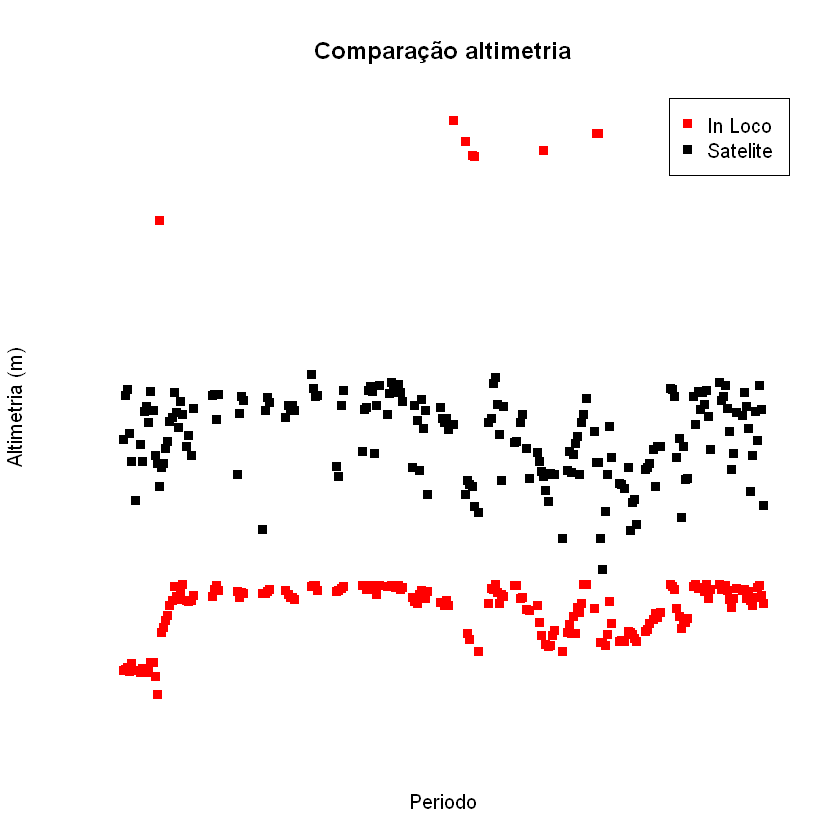

In [67]:
# Visualizando os dados

with(dados_loco2,
    plot(Date.IN.LOCO, satedit,
         pch = 15,
         axes = F,
         xlab = "Periodo",
         ylab = "Altimetria (m)",
         cex = 1,
        ylim = c(210,230),
        main = "Comparação altimetria"
        )
    )

legend("topright",
      legend = c("In Loco", "Satelite"),
      pch = c(15,15), col = c("red", "black"))

par(new = T)

with(dados_loco2,
    plot(Date.IN.LOCO, Altimetry.in.loco,
         pch = 15,
         col = "red",
         axes = F,
         xlab = NA,
         ylab = NA,
         )
    )